# K Nearest Neighbors Project 

Welcome to the KNN Project!
## Import Libraries
**Importing pandas,seaborn, and the usual libraries.**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Reading the 'KNN_Project_Data csv file into a dataframe**

In [63]:
df = pd.read_csv("KNN_Project_Data")

**Checking the head of the dataframe.**

In [64]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**We can use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

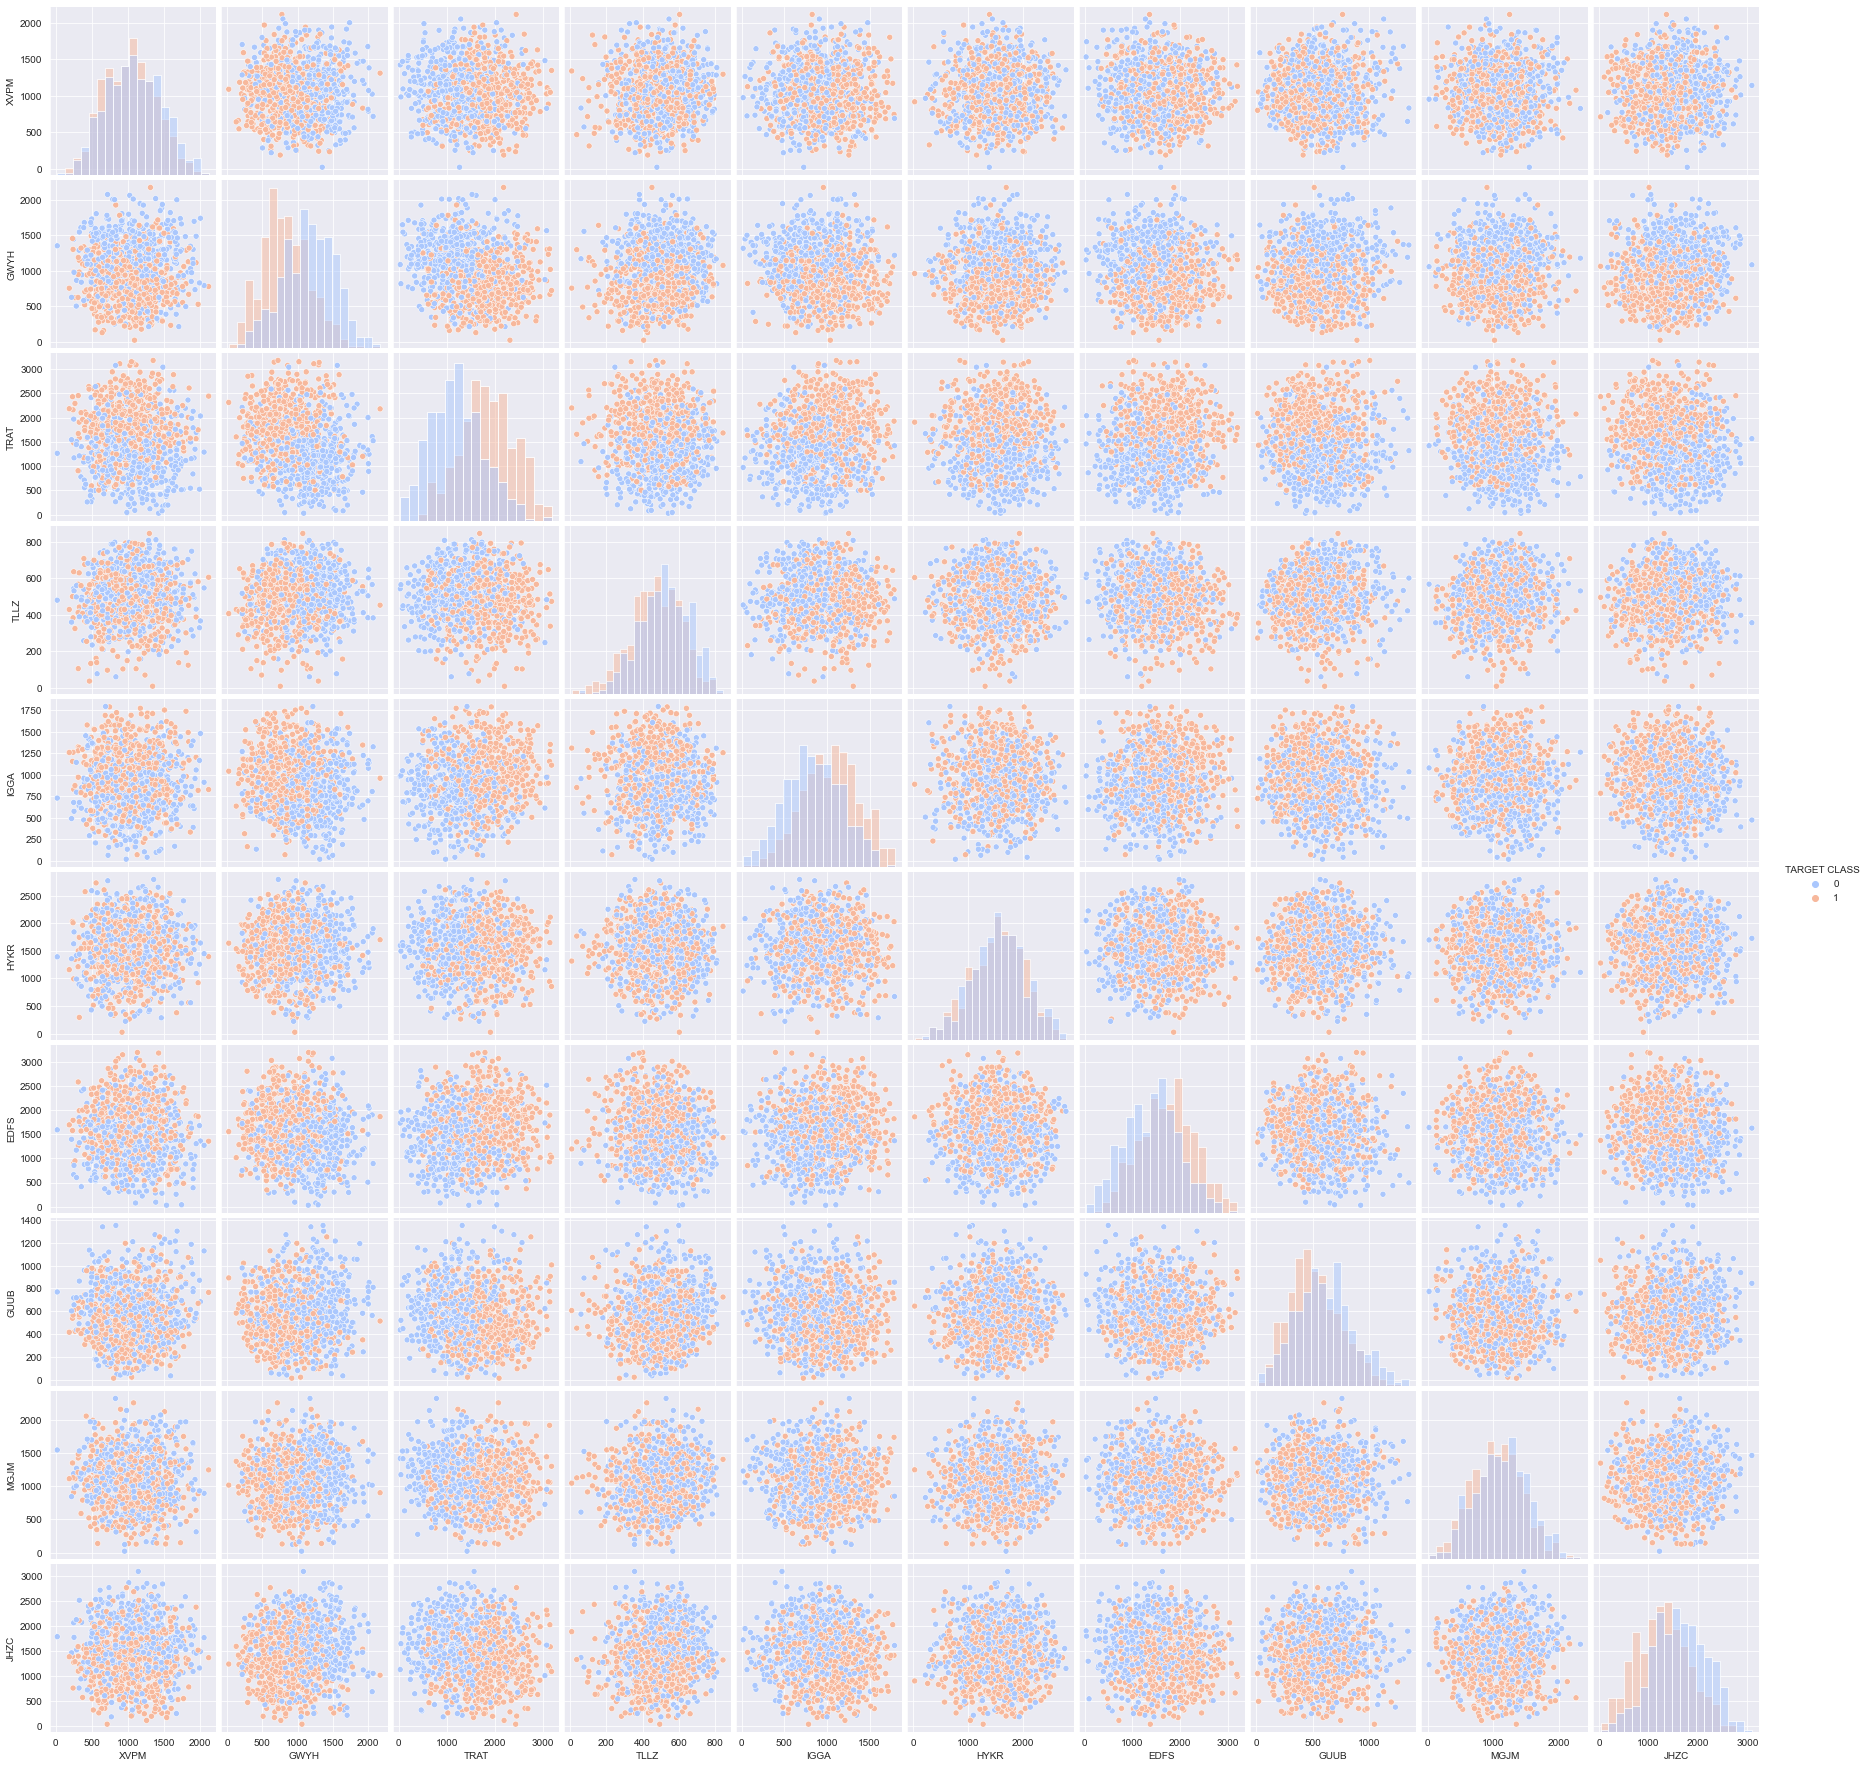

In [65]:
sns.pairplot(data=df,hue="TARGET CLASS",palette="coolwarm",diag_kind="hist")

# Standardizing the Variables

Now it's time to standardize the variables.

**Import StandardScaler from Scikit learn.**

In [66]:
from sklearn.preprocessing import StandardScaler

**First we create a StandardScaler() object called scaler.**

In [67]:
scaler = StandardScaler()

**Fiting scaler to the features.**

In [68]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler()

**We use the .transform() method to transform the features to a scaled version.**

In [69]:
scaled_features = scaler.transform(df.drop("TARGET CLASS",axis=1))

**Converting the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [70]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Using train_test_split to split our data into a training set and a testing set.**

In [71]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# Using KNN

**Importing KNeighborsClassifier from scikit learn.**

In [72]:
from sklearn.neighbors import KNeighborsClassifier

**Creating a KNN model instance with n_neighbors=1**

In [73]:
Knm = KNeighborsClassifier(n_neighbors=1,)

**Then fit this KNN model to the training data.**

In [74]:
Knm.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Now we use the predict method to predict values using our KNN model and X_test.**

In [75]:
predicted = Knm.predict(X_test)

**Creating a confusion matrix and classification report.**

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
print(confusion_matrix(y_test,predicted))

[[109  43]
 [ 41 107]]


In [78]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**First we create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [79]:
lst = []
for x in range(1,40):
    Knn = KNeighborsClassifier(n_neighbors=x)
    Knn.fit(X_train,y_train)
    pred_i = Knn.predict(X_test)
    lst.append(np.mean(pred_i!=y_test))

**Now we create the following plot using the information from our for loop.**

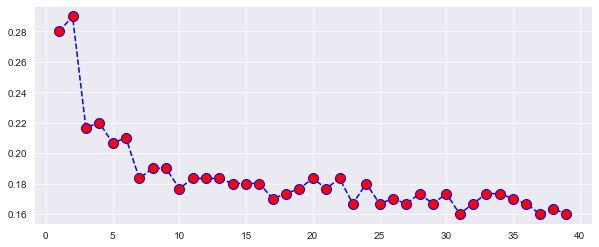

In [80]:
fig = plt.figure(figsize=(10,4))
sns.set_style("darkgrid")
plt.plot(range(1,40),lst,ls="--",marker="o",markerfacecolor="red",markersize=10
        ,color="blue")

## Retrain with new K Value

**Retraining our model with the best K value (up to us to decide what we want) and re-doing the classification report and the confusion matrix).**

In [81]:
Knm = KNeighborsClassifier(n_neighbors=30)
Knm.fit(X_train,y_train)
pred = Knm.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[124  28]
 [ 24 124]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



# Great Job!